In [159]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pandas as pd
from parsel import Selector

In [161]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

In [163]:
url = "https://books.toscrape.com/"
print(url)

https://books.toscrape.com/


In [165]:
response = requests.get(url, headers=headers)
print(response.status_code)  # Check if the request was successful


200


In [92]:
soup = BeautifulSoup(response.text, 'lxml')
print(soup)

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]--><!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]--><!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]--><!--[if gt IE 8]><!--><html class="no-js" lang="en-us"> <!--<![endif]-->
<head>
<title>
    All products | Books to Scrape - Sandbox
</title>
<meta content="text/html; charset=utf-8" http-equiv="content-type"/>
<meta content="24th Jun 2016 09:29" name="created"/>
<meta content="" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="NOARCHIVE,NOCACHE" name="robots"/>
<!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
<!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
<link href="static/oscar/favicon.ico" rel="shortcut icon"/>
<link href="static/oscar/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="static

In [167]:
all_books = []

In [169]:
for page in range(1, 50):
    url = f'https://books.toscrape.com/catalogue/page-{page}.html'
    print(f"Scraping {url}")
      


Scraping https://books.toscrape.com/catalogue/page-1.html
Scraping https://books.toscrape.com/catalogue/page-2.html
Scraping https://books.toscrape.com/catalogue/page-3.html
Scraping https://books.toscrape.com/catalogue/page-4.html
Scraping https://books.toscrape.com/catalogue/page-5.html
Scraping https://books.toscrape.com/catalogue/page-6.html
Scraping https://books.toscrape.com/catalogue/page-7.html
Scraping https://books.toscrape.com/catalogue/page-8.html
Scraping https://books.toscrape.com/catalogue/page-9.html
Scraping https://books.toscrape.com/catalogue/page-10.html
Scraping https://books.toscrape.com/catalogue/page-11.html
Scraping https://books.toscrape.com/catalogue/page-12.html
Scraping https://books.toscrape.com/catalogue/page-13.html
Scraping https://books.toscrape.com/catalogue/page-14.html
Scraping https://books.toscrape.com/catalogue/page-15.html
Scraping https://books.toscrape.com/catalogue/page-16.html
Scraping https://books.toscrape.com/catalogue/page-17.html
Scrapi

In [181]:
selector = Selector(text=response.text)

In [183]:
rating_class = book.css('p.star-rating::attr(class)').get()
rating = rating_class.replace('star-rating', '').strip() if rating_class else 'No rating'


In [185]:
availability_list = book.css('p.instock.availability::text').getall()
availability = ''.join([text.strip() for text in availability_list if text.strip()])


In [187]:
price_text = book.css('p.price_color::text').get()
cleaned_price = price_text.replace('£', '').replace('Â', '').strip()
price = float(cleaned_price)


In [189]:
import re

price_text = book.css('p.price_color::text').get()
price_num = re.findall(r'[\d\.]+', price_text)  # finds digits and dot
price = float(price_num[0]) if price_num else None



In [191]:
price_text = book.css('p.price_color::text').get()
price_text = price_text.encode('ascii', 'ignore').decode()  # removes weird chars
price = float(price_text.replace('£', '').strip())

In [193]:
rating_map = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}

# Assuming your DataFrame is called df
df['Rating'] = df['Rating'].map(rating_map)

print(df)



                                                Title    Price  Rating  \
0                         On the Road (Duluoz Legend)  Â£32.36       3   
1   Old Records Never Die: One Man's Quest for His...  Â£55.66       2   
2                                  Off Sides (Off #1)  Â£39.45       5   
3                                     Of Mice and Men  Â£47.11       2   
4                                 Myriad (Prentor #1)  Â£58.75       4   
5                My Perfect Mistake (Over the Top #1)  Â£38.92       2   
6   Ms. Marvel, Vol. 1: No Normal (Ms. Marvel (201...  Â£39.39       4   
7                                         Meditations  Â£25.89       2   
8                                             Matilda  Â£28.34       1   
9                               Lost Among the Living  Â£27.70       4   
10                                  Lord of the Flies  Â£24.89       3   
11                           Listen to Me (Fusion #1)  Â£58.99       3   
12                      Kitchens of th

In [200]:


rating_map = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}

books = []
for book in selector.css('article.product_pod'):
    title = book.css('h3 a::attr(title)').get()
    
    price_text = book.css('p.price_color::text').get()
    price_num = re.findall(r'[\d\.]+', price_text)  # Extract digits and dot
    price = float(price_num[0]) if price_num else None
    
    rating_class = book.css('p.star-rating::attr(class)').get()
    rating_text = rating_class.replace('star-rating', '').strip() if rating_class else 'No rating'
    rating = rating_map.get(rating_text, 0)  # default 0 if not found
    
    availability_list = book.css('p.instock.availability::text').getall()
    availability = ''.join([text.strip() for text in availability_list if text.strip()])
    
    books.append({
        'Title': title,
        'Price': price,
        'Rating': rating,
        'Availability': availability
    })


In [202]:

df = pd.DataFrame(books)
df

,Title,Price,Rating,Availability
0,On the Road (Duluoz Legend),32.36,3,In stock
1,Old Records Never Die: One Man's Quest for His...,55.66,2,In stock
2,Off Sides (Off #1),39.45,5,In stock
3,Of Mice and Men,47.11,2,In stock
4,Myriad (Prentor #1),58.75,4,In stock
5,My Perfect Mistake (Over the Top #1),38.92,2,In stock
6,"Ms. Marvel, Vol. 1: No Normal (Ms. Marvel (201...",39.39,4,In stock
7,Meditations,25.89,2,In stock
8,Matilda,28.34,1,In stock
9,Lost Among the Living,27.70,4,In stock


In [204]:
df.to_csv('books_data.csv', index=False)
print("Data saved to books_data.csv")

Data saved to books_data.csv


In [206]:
df1 = pd.read_csv('books_data.csv')
df1.head()

,Title,Price,Rating,Availability
0,On the Road (Duluoz Legend),32.36,3,In stock
1,Old Records Never Die: One Man's Quest for His...,55.66,2,In stock
2,Off Sides (Off #1),39.45,5,In stock
3,Of Mice and Men,47.11,2,In stock
4,Myriad (Prentor #1),58.75,4,In stock


In [208]:
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
# Distribution of Prices

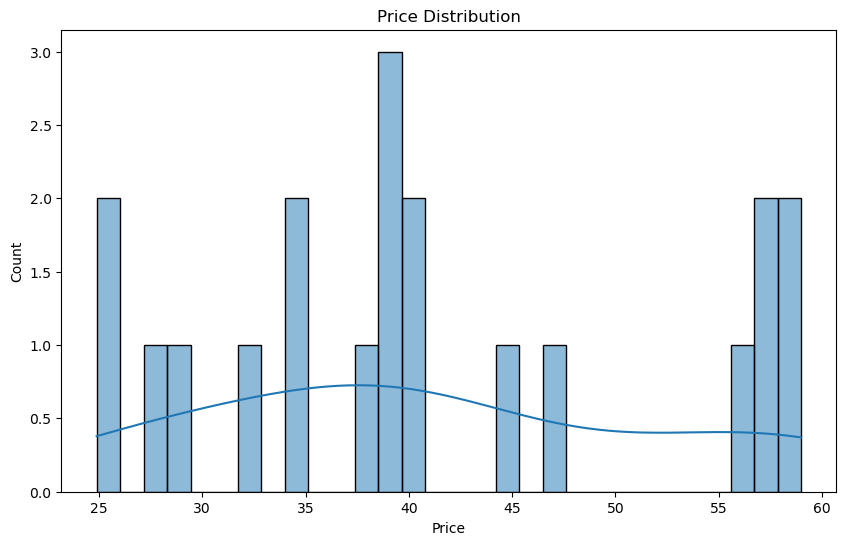

In [214]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.show()

In [216]:
# Count of books by Rating

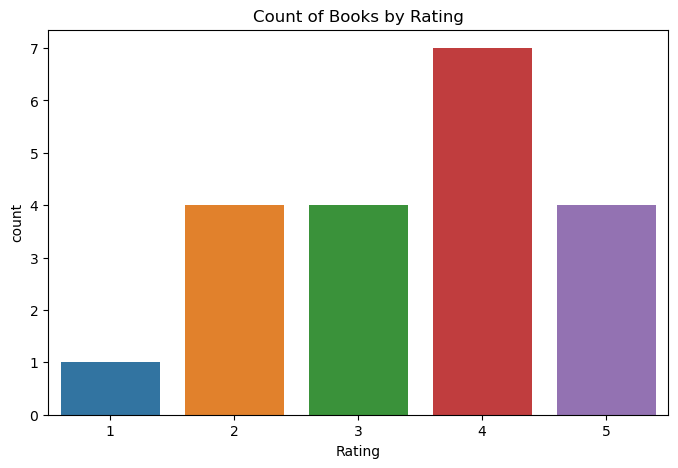

In [218]:
plt.figure(figsize=(8,5))
sns.countplot(x='Rating', data=df)
plt.title('Count of Books by Rating')
plt.show()

In [220]:
# Price vs Rating scatterplot

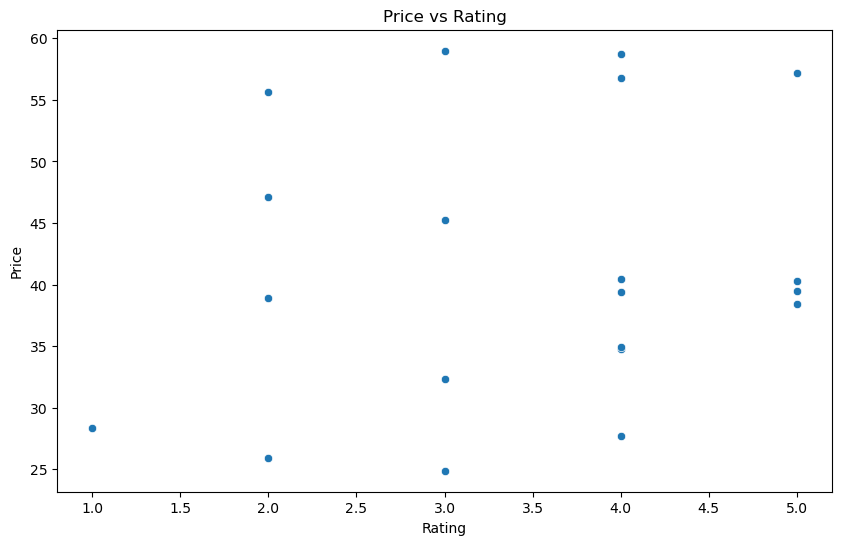

In [222]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Rating', y='Price', data=df)
plt.title('Price vs Rating')
plt.show()

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [226]:
X = df[['Rating']]  
y = df['Price'] 

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [230]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [232]:
y_pred = model.predict(X_test)

In [236]:
print(f"RMSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")

RMSE: 117.29
R^2 Score: -0.44


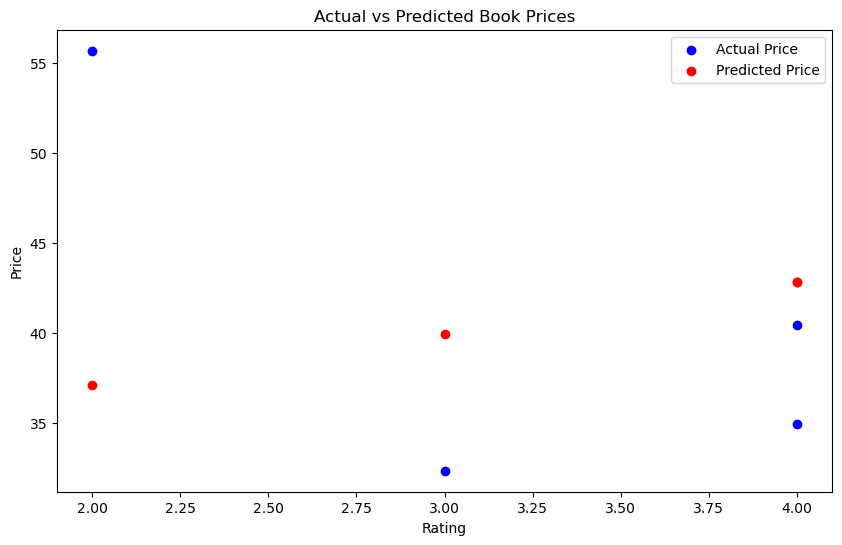

In [238]:
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Actual Price')
plt.scatter(X_test, y_pred, color='red', label='Predicted Price')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Actual vs Predicted Book Prices')
plt.legend()
plt.show()
